# 지역별 타겟팅.
목표: 다음 분기에는 어떤 게임을 설계해야 할까?

문제: 1900년 대에 비해 비디오 게임 시장이 많이 침체되었다. 스마트폰의 발달로 생겨난 SNS나 넷플릭스가 게임 외에도 즐길 수 있는 다양한 볼거리를 제공함으로 비디오 게임 시장에 영향을 미쳤을 것으로 판단.

하지만, 코로나 19로 야외 활동 자제 -> 가정용 엔터테이먼트가 인기 -> 게임 시장에서는 좋은 기회 -> 게임 데이터를 통해 어떤 게임이 인기를 끌지 분석하면 침체된 비디오 게임 시장도 부활 시킬 수 있지 않을까?

가설: 지역별로 선호하는 게임의 장르가 다르지 않을까?

이유: 지역마다 문화, 환경, 관습이 다르기 때문에 취향도 다를 것이다.

증거: 국내 영화 선호도 데이터(한 국가 내에서도 이렇게 선호도가 다르다.) 그럼 나라끼리는 얼마나 다를까

선호하는 게임의 장르가 같으면 지역별로 타겟팅 할 필요가 없을 것이고, 선호하는 게임의 장르가 유의미하게 차이가 나면 지역별로 다른 게임을 타겟팅 하면 한 지역에서만 흥행하는 게임이 아니라 여러 지역에서 게임을 흥행시킬 수 있지 않을까.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv",index_col = 0)
print(df.shape)
df.head()

(16598, 9)


Name Platform  ...  JP_Sales Other_Sales
1                    Candace Kane's Candy Factory       DS  ...         0           0
2                                  The Munchables      Wii  ...         0        0.01
3  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  ...      0.02           0
4                Deal or No Deal: Special Edition       DS  ...         0           0
5       Ben 10 Ultimate Alien: Cosmic Destruction      PS3  ...         0        0.04

[5 rows x 9 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [4]:
df.loc[df.Year.isnull()].head()

Name Platform  ...  JP_Sales Other_Sales
32                                     Rock Band     X360  ...         0        0.21
110   Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)      Wii  ...      0.02           0
274  Jewel Link Chronicles: Mountains of Madness       DS  ...         0        0.01
359           Majesty 2: The Fantasy Kingdom Sim     X360  ...         0           0
431                                   Famista 64      N64  ...      0.17        0.03

[5 rows x 9 columns]

In [5]:
df.Year.fillna("2022",inplace = True)
df.Year.isnull().sum()

0

In [6]:
df.Year = df.Year.astype(int)
df.Year.dtype

dtype('int64')

In [7]:
#년도 오타 수정
#20보다 작으면 2000년대로 판단하여 2000을 더해주고
#20보다 크면 1900년대로 판단하여 1900을 더해줌
print(df['Year'].unique())
df.loc[df['Year'] <= 20,'Year'] = df.loc[df['Year'] <= 20,'Year'] + 2000
df.loc[(df['Year'] > 20) & (df['Year'] < 100),'Year'] = df.loc[(df['Year'] > 20) & (df['Year'] < 100),'Year'] + 1900
print('-------------------------------------------------------------')
print(sorted(df['Year'].unique()))
df.head()

[2008 2009 2010 2005 2011 2007 2001 2003 2006 2014 2015 2002 1997 2013
 1996 2004 2000 2022 1984 1998 2016 1985 1999    9   97 1995 1993 2012
 1987 1982   11 1994 1990   15 1992 1991 1983 1988 1981    3 1989   96
    6    8 1986    1    5    4   10   98    7   16   86   14   95 2017
 1980 2020    2   13    0   12   94]
-------------------------------------------------------------
[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2020, 2022]


Name Platform  ...  JP_Sales Other_Sales
1                    Candace Kane's Candy Factory       DS  ...         0           0
2                                  The Munchables      Wii  ...         0        0.01
3  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  ...      0.02           0
4                Deal or No Deal: Special Edition       DS  ...         0           0
5       Ben 10 Ultimate Alien: Cosmic Destruction      PS3  ...         0        0.04

[5 rows x 9 columns]

In [8]:
df.loc[df.Genre.isnull()].head()

Name Platform  ...  JP_Sales Other_Sales
51          Ape Escape: On the Loose      PSP  ...      0.12        0.05
409                      NBA Ballers       XB  ...         0        0.02
1329                      NFL Street       XB  ...         0        0.02
1583  SingStar Singalong With Disney      PS2  ...         0        0.57
1972             Pokemon X/Pokemon Y      3DS  ...      4.34        0.79

[5 rows x 9 columns]

In [9]:
print(df.Genre.unique())
df.Genre.fillna('Unknown',inplace = True)
print(df.Genre.unique())
df.Genre.isnull().sum()

['Action' 'Adventure' 'Misc' 'Platform' 'Sports' 'Simulation' 'Racing'
 'Role-Playing' 'Puzzle' 'Strategy' 'Fighting' 'Shooter' nan]
['Action' 'Adventure' 'Misc' 'Platform' 'Sports' 'Simulation' 'Racing'
 'Role-Playing' 'Puzzle' 'Strategy' 'Fighting' 'Shooter' 'Unknown']


0

In [10]:
df.loc[df.Publisher.isnull()].head()

Name  ... Other_Sales
273                                  UK Truck Simulator  ...           0
1314     All Grown Up!: Game Boy Advance Video Volume 1  ...           0
1561  Teenage Mutant Ninja Turtles: Game Boy Advance...  ...           0
1790  Nicktoons Collection: Game Boy Advance Video V...  ...           0
1880                     Monster Hunter Frontier Online  ...           0

[5 rows x 9 columns]

In [11]:
print(df.Publisher.nunique())
print((df.Publisher.unique() == 'Unknown').sum()) # 모르는 출판사는 Unknown으로 표기 했음.
df.Publisher.fillna('Unknown',inplace = True)
df.Publisher.isnull().sum()

578
1


0

In [12]:
df.isnull().sum().sum() #NA 모두 제거

0

In [13]:
print(display(df.loc[df.NA_Sales.isin(['0M','0K'])].head()))
print('-----------------------------------')
print(display(df.loc[df.EU_Sales.isin(['0M','0K'])].head()))
print('-----------------------------------')
print(display(df.loc[df.JP_Sales.isin(['0M','0K'])].head()))
print('-----------------------------------')
print(display(df.loc[df.Other_Sales.isin(['0M','0K'])].head()))

Name  ... Other_Sales
146                               TOCA Race Driver 3  ...           0
768                PDC World Championship Darts 2009  ...           0
879   Tears to Tiara Anecdotes: The Secret of Avalon  ...           0
1087                       Pro Evolution Soccer 2014  ...           0
1470                            Total War: WARHAMMER  ...        0.01

[5 rows x 9 columns]

None
-----------------------------------


Name Platform  ...  JP_Sales Other_Sales
129                   Rozen Maiden: Gebetgarten      PS2  ...      0.01           0
1516  Capcom vs. SNK: Millennium Fight 2000 Pro       DC  ...      0.05           0
1586        Konami Classics Series: Arcade Hits       DS  ...      0.02          0K
1872                               Majin Tensei     SNES  ...      0.08           0
1896                     Heart no Kuni no Alice      PSP  ...      0.01           0

[5 rows x 9 columns]

None
-----------------------------------


Name Platform  ...  JP_Sales Other_Sales
11                               Ford Racing       PS  ...        0K        0.06
90                  Bugs Bunny: Lost in Time       PS  ...        0K        0.03
91        Tom Clancy's Ghost Recon: Predator      PSP  ...        0K        0.02
585        Imagine: Figure Skater (US sales)       DS  ...        0M           0
845  The Legend of Spyro: Dawn of the Dragon      Wii  ...        0K        0.05

[5 rows x 9 columns]

None
-----------------------------------


Name Platform  ...  JP_Sales Other_Sales
65                          SD Gundam Force      GBA  ...         0          0M
210   Harry Potter and the Sorcerer's Stone       XB  ...         0          0M
244      Seaman 2: Peking Genjin Ikusei Kit      PS2  ...      0.06          0M
281                    Warhammer: Dark Omen       PS  ...         0          0K
1085  Mission: Impossible - Operation Surma       GC  ...         0          0M

[5 rows x 9 columns]

None


In [14]:
#numeric 변수여야하는 NA_Sales, EU_Sales, JP_Sales, Other_Sales의 M과 K를 제거하고
#M,K를 백만과 천 단위로 판단하여 M에 해당하는 데이터는 백만, K에 해당하는 데이터는 1000을 곱해주려고 했다.
#하지만 M과 K가 붙어있는 수에 백만이나 천을 곱하면 데이터의 스케일이 너무 다르다고 판단해서
#기본 단위를 백만 단위로 가정하고 백만 단위인데 M이 붙어있으면 오타로 판단했다.
#따라서 M이 붙어있으면 원래 기본 단위가 백만이니까 M을 제거해주고
#또 K는 천 단위를 백만 단위로 맞춰주기 위해서 1000/1000000 인 0.001을 곱해줬다.


def remove_mk(s):
  if s[-1] == 'M': 
    return float(s.replace('M',''))
  elif s[-1] == 'K':
    return float(s.replace('K','')) * 0.001
  else:
    return float(s)


In [15]:
cols = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
for col in cols:
  df[col] = df[col].apply(remove_mk)
print(df[cols].isin(['0M','0K']).sum())
print(df.dtypes)

NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64
Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object


In [16]:
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df.describe()

Year      NA_Sales  ...   Other_Sales   Total_Sales
count  16598.000000  16598.000000  ...  16598.000000  16598.000000
mean    2006.661043      0.264667  ...      0.048063      0.537164
std        6.109646      0.816683  ...      0.188588      1.555151
min     1980.000000      0.000000  ...      0.000000      0.000000
25%     2003.000000      0.000000  ...      0.000000      0.060000
50%     2007.000000      0.080000  ...      0.010000      0.170000
75%     2011.000000      0.240000  ...      0.040000      0.470000
max     2022.000000     41.490000  ...     10.570000     82.740000

[8 rows x 6 columns]

In [17]:
df.head()

Name  ... Total_Sales
1                    Candace Kane's Candy Factory  ...        0.04
2                                  The Munchables  ...        0.18
3  Otome wa Oanesama Boku ni Koi Shiteru Portable  ...        0.02
4                Deal or No Deal: Special Edition  ...        0.04
5       Ben 10 Ultimate Alien: Cosmic Destruction  ...        0.25

[5 rows x 10 columns]

# 1. 지역에 따라서 선호하는 게임 장르가 다를까?

ANOVA를 통해 장르별로 지역별로 출고량 평균이 유사한지 확인했다. p-value가 0.05보다 작은 것을 보아 장르별, 지역별 출고량의 평균이 유의미하게 차이가 난다는 것을 알 수 있다. 그렇다면 어떤 장르가 어떻게 차이가 날까?

일본만  Role-Playing, Platform, Fighting, Puzzle, Simulation 장르가 가장 많이 출고되었고 북미, 유럽, 기타 지역에서는 Platform, Shooter, Sports, Racing, Action이 비슷한 순위로 인기를 끌었다. 따라서 북미,유럽,기타 지역은 선호하는 게임 장르가 비슷하고, 일본은 선호 게임 장르가 다르다고 할 수 있다.

단순히 특정해에만 히트를 친 게임도 있었을 것이기 때문에, 평균이 아니라 sum을 사용하면 한 게임에만 영향을 너무 많이 받을 수 있다고 판단해서 전체데이터를 비교할 때는 총합 대신 평균을 사용하여 예전부터 지금까지 얼만큼 꾸준히 사랑받았나를 측정했다.

In [18]:
df_n = df.loc[df.Genre != 'Unknown'].groupby('Genre')['NA_Sales'].mean().to_frame()
df_e = df.loc[df.Genre != 'Unknown'].groupby('Genre')['EU_Sales'].mean().to_frame()
df_j = df.loc[df.Genre != 'Unknown'].groupby('Genre')['JP_Sales'].mean().to_frame()
df_o = df.loc[df.Genre != 'Unknown'].groupby('Genre')['Other_Sales'].mean().to_frame()
df_reg = pd.concat([df_n,df_e,df_j,df_o],axis = 1)
df_reg

NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                  
Action        0.264693  0.157991  0.047776     0.056415
Adventure     0.082547  0.050039  0.040586     0.013133
Fighting      0.263518  0.119504  0.103117     0.043259
Misc          0.235323  0.122468  0.060709     0.042699
Platform      0.505023  0.228066  0.147794     0.058292
Puzzle        0.213408  0.087768  0.098391     0.021661
Racing        0.287361  0.190748  0.045374     0.062027
Role-Playing  0.215469  0.123790  0.232603     0.038409
Shooter       0.444893  0.239335  0.029266     0.078479
Simulation    0.211514  0.131040  0.073642     0.036393
Sports        0.290696  0.160820  0.057826     0.057527
Strategy      0.101029  0.066647  0.072735     0.016706

In [19]:
#등분산성, 정규성이 만족한다는 가정 아래.
from scipy.stats import f_oneway
f_oneway(df_reg['NA_Sales'], df_reg['EU_Sales'], df_reg['JP_Sales'], df_reg['Other_Sales'])
#p-value가 0.05보다 작기 때문에 그룹간 차이가 유의미하다고 할 수 있다.

F_onewayResult(statistic=19.52102101347965, pvalue=3.391282621510732e-08)

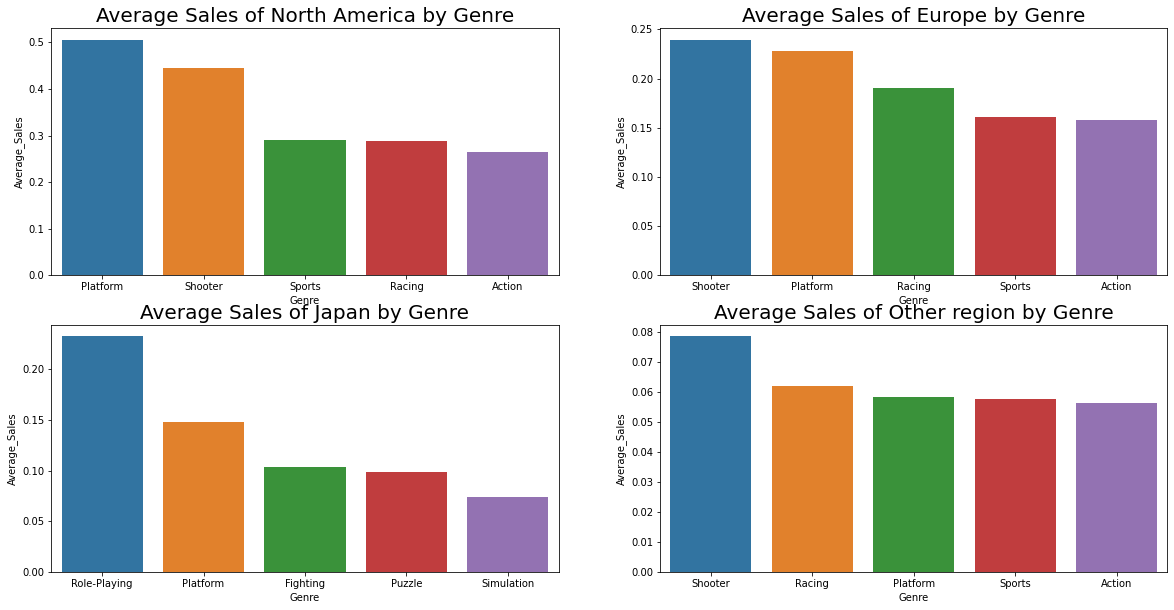

In [20]:
fig = plt.figure(figsize=(20, 10))

def make_prefer(col,num):
  if col == 'NA_Sales':
    n = 'Average Sales of North America by Genre'
  elif col == 'EU_Sales':
    n = 'Average Sales of Europe by Genre'
  elif col == 'JP_Sales':
    n = 'Average Sales of Japan by Genre'
  else:
    n = 'Average Sales of Other region by Genre'
  df_graph = df_reg.rename(columns = {col : 'Average_Sales'}).sort_values(by = 'Average_Sales',ascending = False).reset_index().iloc[:5]
  ax = plt.subplot(2,2,num) 
  sns.barplot(x = 'Genre', y = 'Average_Sales', data = df_graph)
  plt.title(n, size = 20)

make_prefer('NA_Sales',1)
make_prefer('EU_Sales',2)
make_prefer('JP_Sales',3)
make_prefer('Other_Sales',4)
plt.show()

#2. 연도별 게임의 트렌드가 있을까?
년도가 2022라는 것은 내가 NA값을 처리하기 위해 넣은 임의의 값이므로 정확한 연도가 아니기 때문에 연도별 트렌드에서 제외
장르만 따로 뽑아서 x는 연도, y는 Total Sales 하고 그래프 색을 다르게 여러개로 비교하면 어떤 장르가 인기를 끌었는지, 유독 게임이 많이 팔린 년도가 언젠지 알 수 있지 않을까.

이런식으로 10년씩 어떤 장르가 년도별로 인기를 끌었는가 보고
최근 5년 동안 가장 인기를 끌었던 장르를 연도별로 graph 그리면 연도별 트렌드를 알 수 있지 않을까.

전체 연도로 봤을 때 슈터와 플랫폼 장르의 게임이 연마다 최대 인기를 끌었던 횟수가 많다. 특히 지난 10년 동안에는 슈팅 게임이 인기가 많았다.
하지만 연도마다 scale의 차이가 커서 비교 하기 힘들기 때문에 10년씩 나눠서 보자.


In [21]:
df_year = df.loc[(df.Year != 2022) & (df.Genre != 'Unknown')]
df_year = df_year.groupby(['Year','Genre'])['Total_Sales'].mean().to_frame().reset_index()
df_year = df_year.loc[df_year.Total_Sales.isin(list(df_year.groupby(['Year'])['Total_Sales'].max()))]
df_year.reset_index(drop = True, inplace = True)
df_year.head()

Year     Genre  Total_Sales
0  1980   Shooter     3.535000
1  1981  Platform     2.306667
2  1982    Puzzle     3.346667
3  1983    Sports     3.200000
4  1984   Shooter    10.366667

In [22]:
df_year["Genre"].unique()

array(['Shooter', 'Platform', 'Puzzle', 'Sports', 'Role-Playing',
       'Adventure', 'Action', 'Racing', 'Fighting', 'Simulation'],
      dtype=object)

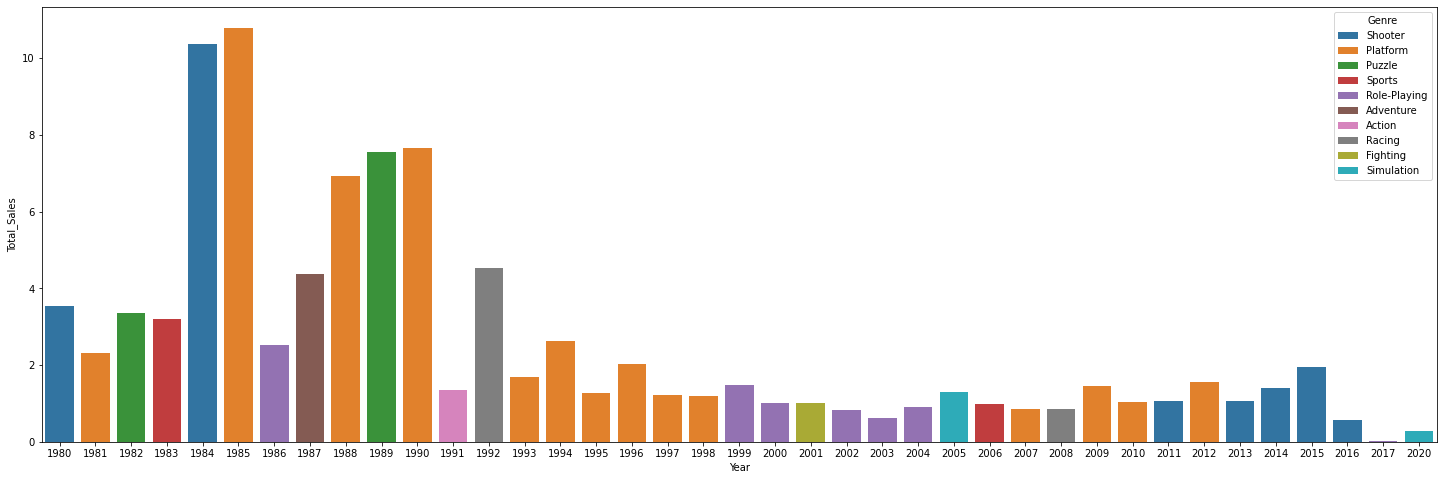

In [23]:
fig = plt.figure(figsize=(25, 8)) 
sns.barplot(x = 'Year', y = 'Total_Sales', hue = 'Genre', data = df_year, dodge = False)

# 전체적인 트렌드

## 1980년대 (1984,1985)
닌텐도 NES의 등장으로 침체되었던 게임 시장이 부활했다.
1984년 Duck hunt, 1985년 Super Mario bros

## 1990년대 (1990, 1992)
Super Nintendo Entertainment System의 약자인 SNES의 등장.
닌텐도가 패미컴의 뒤를 잇는 게임기로 1990년에 발매한 가정용 게임기. Super Family Computer. 대히트 ex) 1990 Super mario world 초히트, 1992 Super mario kart도 나옴(레이싱)

## 2000년대 (2005, 2009)

2004년말, 닌텐도 DS 등장. 튼튼한 하드웨어와 터치 스크린, 참신한 인터페이스 덕분에 아주 큰 인기를 끌었다. 대표 게임으로는 애완견을 키우는 시뮬레이션 힐링게임 닌텐독스와 마리오 카트 DS가 있다.

2006년 Wii의 등장으로 Wii Sports와 Mario 게임이 엄청난 인기를 끌었다.

##2010년대 (2012, 2015)
PS3가 본격적으로 흥행했다. GTA나 Call of Duty와 같은 Action, Shooting게임들이 인기를 끌었다. 닌텐도의 마리오 게임도 여전히 인기.

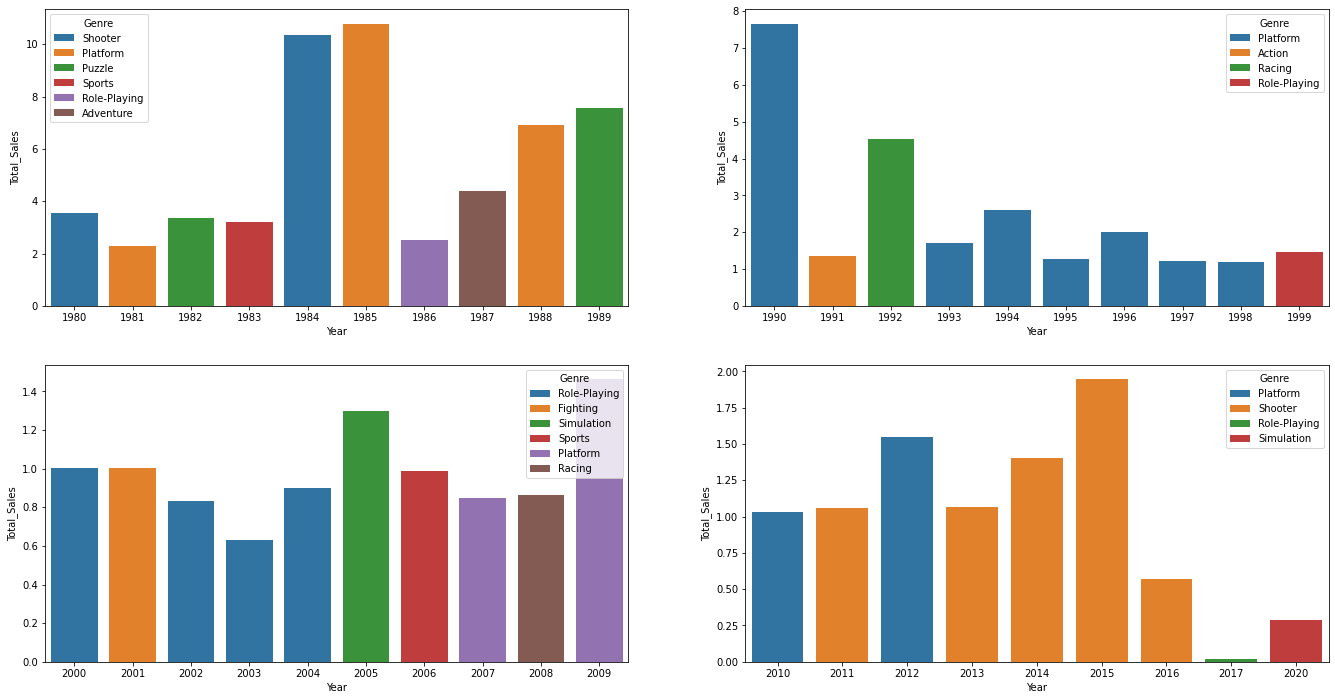

In [24]:
fig = plt.figure(figsize=(23, 12)) 
df_80 = df_year.loc[df_year['Year'] < 1990]
df_90 = df_year.loc[(df_year['Year'] >= 1990) & (df_year['Year'] < 2000)]
df_00 = df_year.loc[(df_year['Year'] >= 2000) & (df_year['Year'] < 2010)]
df_10 = df_year.loc[(df_year['Year'] >= 2010)]

#plt.sub해서 표현
ax1 = plt.subplot(2,2,1) 
sns.barplot(x = 'Year', y = 'Total_Sales', hue = 'Genre', data = df_80, dodge = False)

ax2 = plt.subplot(2,2,2) 
sns.barplot(x = 'Year', y = 'Total_Sales', hue = 'Genre', data = df_90, dodge = False)

ax3 = plt.subplot(2,2,3) 
sns.barplot(x = 'Year', y = 'Total_Sales', hue = 'Genre', data = df_00, dodge = False)

ax4 = plt.subplot(2,2,4) 
sns.barplot(x = 'Year', y = 'Total_Sales', hue = 'Genre', data = df_10, dodge = False)

plt.show()

In [25]:
# df.loc[df['Year'] == 1984].Platform.unique()
# df.loc[df['Year'] == 1985].Platform.unique()
# df.loc[df['Year'] == 1990].Platform.unique() #GB는 닌텐도에서 내놓은 휴대용 게임기, SNES는 슈퍼 닌텐도를 의미한다. 슈퍼 패미컴 등장.
# df.loc[df['Year'] == 2004].Platform.unique() # 2004년 11월 등장, 그래서 2005년에 마리오 카트랑, 애완견 키우는 힐링게임 닌텐 독스 인기. 
# df.loc[df['Year'] == 2009].Platform.unique()
# df.loc[df['Year'] == 2012].Platform.unique()

# df.loc[df['Year'] == 1990].sort_values(by = 'Total_Sales',ascending = False).head(5)
# df.loc[df['Year'] == 1984].sort_values(by = 'Total_Sales',ascending = False).head(5)
# df.loc[df['Year'] == 1985].sort_values(by = 'Total_Sales',ascending = False).head(5)
#df.loc[df['Year'] == 1992].sort_values(by = 'Total_Sales',ascending = False).head(5)
#df.loc[df['Year'] == 2005].sort_values(by = 'Total_Sales',ascending = False).head(5)
#df.loc[df['Year'] == 2009].sort_values(by = 'Total_Sales',ascending = False).head(5)
#df.loc[df['Year'] == 2015].sort_values(by = 'Total_Sales',ascending = False).head(5)
# df.loc[df['Year'] == 2015].sort_values(by = 'Total_Sales',ascending = False).head(5)
# df.loc[df['Year'] == 2014].sort_values(by = 'Total_Sales',ascending = False).head(10)
#2017년부터는 데이터가 없음.


# 최근 7년 트렌드
최근 7년간 세부적인 Trend를 봐보자.
7년동안 Total_Sales가 가장 높은 게임을 년도별로 3개씩 뽑아서 데이터를 만들고, 그래프를 그려서 비교해보았다.

그 전까지는 평균을 사용해서 데이터를 비교했지만, 최근 7년 동안에는 평균보다 총합을 사용해야 구체적으로 어떠한 게임이 흥행했는가를 알 수 있을 것 같다. 평균처럼 출고량이 고루고루 좋은 분포를 보기 보다는 특정 게임이 얼마나 흥행했는가를 보고싶기 때문에 평균이 아니라 총합을 사용한다.

7년동안 Shooting 게임 장르가 다른 장르에 비해 큰 히트를 쳤고, 특히 call of duty 시리즈가 꾸준한 인기를 끌었다.

GTA, 포켓몬 시리즈도 인기를 끌었고, 2010년대 후반부부터는 피파도 꾸준히 상위권에 랭크되었다.

In [26]:
#2017년 이후로는 데이터가 너무 없어서 분석에 도움이 안 된다고 판단
df_10s = df.loc[(df.Year >= 2010) & (df.Year < 2017) & (df.Genre != 'Unknown')]
df_10s.reset_index(inplace = True, drop = True)
func = lambda g: g.sort_values(by = 'Total_Sales', ascending = False)[:3]
df_10s = df_10s.groupby('Year').apply(func)
df_10s.reset_index(drop = True,inplace = True)
display(df_10s.head(6))

#플랫폼만 다르고 똑같은 게임 중복 제거. 두 출고량을 더해준다.
df_10s = df_10s.groupby(['Name','Genre'])['Total_Sales'].sum().to_frame().reset_index()
df_10s = df_10s.sort_values(by = 'Total_Sales', ascending = False)
df_10s.reset_index(drop = True, inplace = True)
df_10s.head()

Name Platform  ...  Other_Sales Total_Sales
0              Kinect Adventures!     X360  ...         1.67       21.82
1     Pokemon Black/Pokemon White       DS  ...         0.82       15.32
2         Call of Duty: Black Ops     X360  ...         1.13       14.64
3  Call of Duty: Modern Warfare 3     X360  ...         1.32       14.76
4  Call of Duty: Modern Warfare 3      PS3  ...         1.62       13.47
5                    Mario Kart 7      3DS  ...         0.89       12.21

[6 rows x 10 columns]

Name         Genre  Total_Sales
0              Grand Theft Auto V        Action        49.76
1  Call of Duty: Modern Warfare 3       Shooter        28.23
2      Call of Duty: Black Ops II       Shooter        27.78
3              Kinect Adventures!          Misc        21.82
4     Pokemon Black/Pokemon White  Role-Playing        15.32

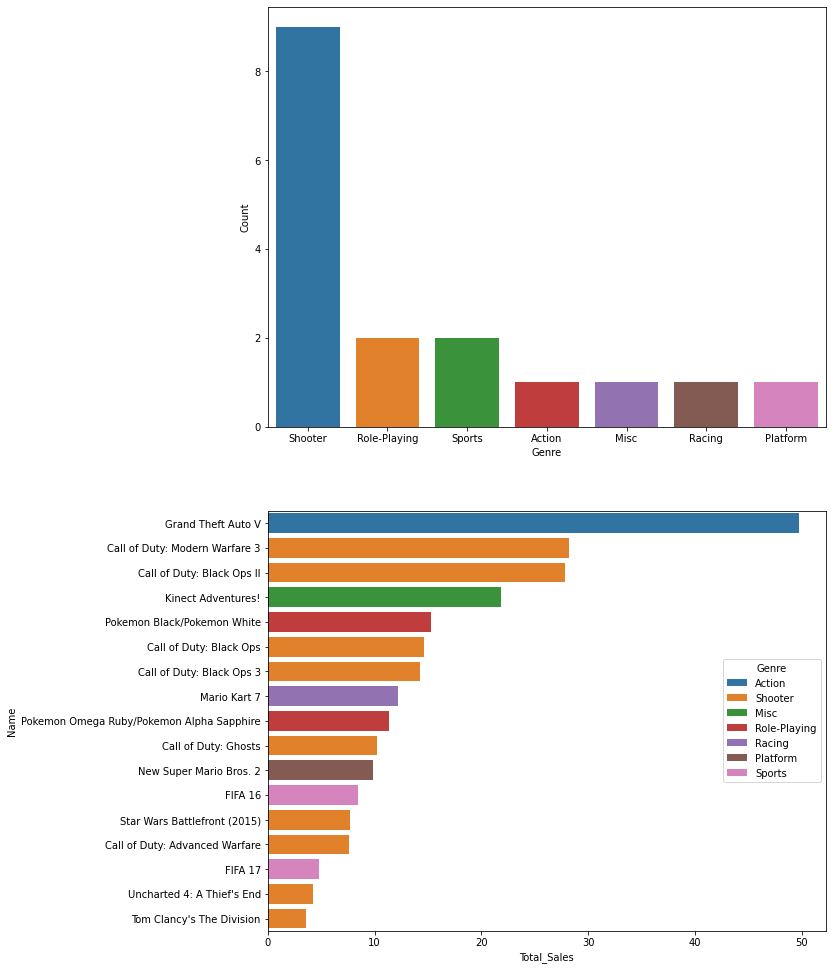

In [27]:
df_10s_genre = df_10s['Genre'].value_counts().to_frame().reset_index()
df_10s_genre.columns = ['Genre','Count']
fig = plt.figure(figsize=(10, 17)) 
ax1 = plt.subplot(2,1,1) 
sns.barplot(x = 'Genre', y = 'Count',data = df_10s_genre)

ax2 = plt.subplot(2,1,2) 
sns.barplot(x= 'Total_Sales', y = 'Name', hue = 'Genre', data = df_10s, dodge = False, ci = None)
plt.show()

# 3. 출고량이 많은 게임 시각화
위의 분석 결과 Call of Duty는 최근 10년간 출고량이 가장 컸다.
특히, Black ops 시리즈와 Modern Warfare 시리즈의 출고량이 큰 것을 알 수가 있다.

In [28]:
df_call = df.loc[df.Genre != 'Unknown'].reset_index(drop = True)
df_call = df_call.loc[df_call.Name.isin([name for name in df_call.Name if 'Call of Duty' in name])]
print(df_call.shape)
df_call.head()

(59, 10)


Name Platform  ...  Other_Sales Total_Sales
121   Call of Duty 4: Modern Warfare     X360  ...         0.90        9.32
130   Call of Duty 4: Modern Warfare       PC  ...         0.03        1.15
472   Call of Duty: Advanced Warfare      PS3  ...         0.77        4.44
864             Call of Duty: Ghosts       PC  ...         0.09        0.73
1918                  Call of Duty 2       PC  ...         0.01        0.06

[5 rows x 10 columns]

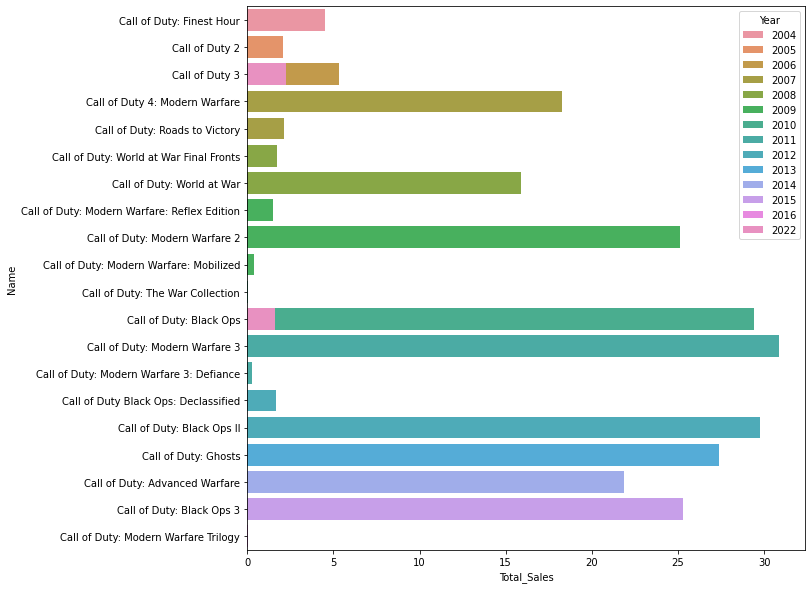

In [29]:
df_call = df_call.groupby(['Name','Year'])['Total_Sales'].sum().to_frame().reset_index()
df_call = df_call.sort_values(by = "Year")
df_call
fig = plt.figure(figsize=(10, 10))
sns.barplot(x = 'Total_Sales', y = 'Name', hue = 'Year',data = df_call, dodge = False)

# 4. 개인분석
Anova 검정을 통해 각 지역별로 전체 출고량의 평균을 비교했더니 p-value가 0.05보다 작게 나왔다. 이를 지역마다 출고량의 차이가 유의미하다고 해석했다.

지역별로 출고량을 상관분석하고, 지역들끼리의 출고량이 상관관계가 명확히 나타나면 지역별로 타겟팅 하면 좋을 것 같다고 판단했다.

상관분석 결과 유럽과 북미는 0.7, 유럽과 기타 지역은 0.72의 양의 상관관계를 띈다. 특히 유럽과 북미, 총 출고량의 상관관계는 거의 1에 가까운 90퍼센트 이상을 띄고있다. 이 말은 총 출고량은 유럽과 북미의 게임 출고량에 아주 큰 영향을 미친다는 뜻이다. 밑의 분석을 보면 유럽과 북미의 출고량을 합하면 총 출고량의 77퍼센트를 차지하는 것을 알 수 있다. 따라서 유럽과 북미의 게임시장을 우선적으로 공략하면 좋을 것 같다. 그 후로 일본도 전체 시장에서 15퍼센트라는 비중을 차지하고 있기 때문에 북미,유럽과는 다른 게임으로 타겟팅하면 각 나라 사람들의 선호에 맞는 게임을 더 잘 개발할 수 있을 것 같다.

In [30]:
#북미, 일본, 기타지역 상관관계 분석 -> 북미랑 기타 지역 상관관계 있으면 걔네를 같이 타겟팅
#북미, 일본, 기타 지역의 출고량을 각각 더해서 비교한 후 일본이 출고량이 꽤나 많으면 일본만 따로 타겟팅.
df_corr = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales']]
#display(df_corr)
display(df_corr.corr())

# # 등분산과 정규성을 만족한다는 가정하에 Anova 분석
# # 평균의 차이가 유의미하다. 
f_oneway(df_corr['NA_Sales'], df_corr['EU_Sales'], df_corr['JP_Sales'], df_corr['Other_Sales'])

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales
NA_Sales     1.000000  0.767727  0.449787     0.634737     0.941050
EU_Sales     0.767727  1.000000  0.435584     0.726385     0.902839
JP_Sales     0.449787  0.435584  1.000000     0.290186     0.611821
Other_Sales  0.634737  0.726385  0.290186     1.000000     0.748351
Total_Sales  0.941050  0.902839  0.611821     0.748351     1.000000

F_onewayResult(statistic=583.5130824706904, pvalue=0.0)

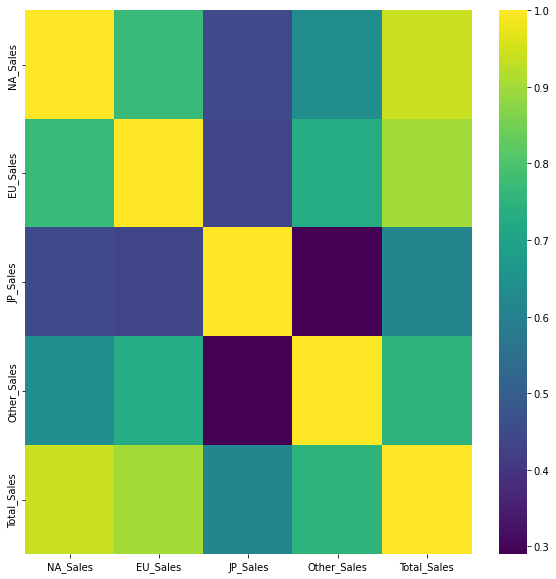

In [31]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(df_corr.corr(), cmap = 'viridis')


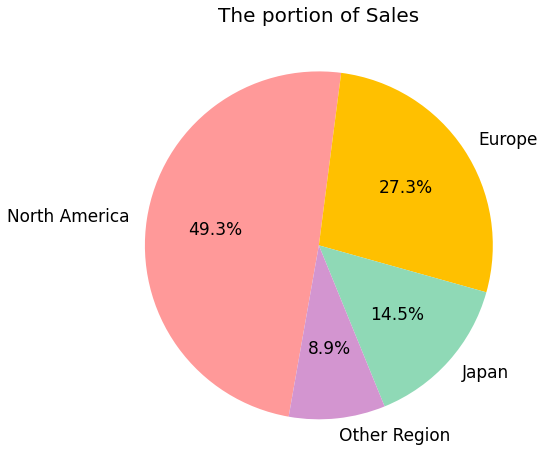

In [32]:
ratio = [df['NA_Sales'].sum()/df['Total_Sales'].sum(),df['EU_Sales'].sum()/df['Total_Sales'].sum(),df['JP_Sales'].sum()/df['Total_Sales'].sum(),df['Other_Sales'].sum()/df['Total_Sales'].sum()]
labels = ['North America', 'Europe', 'Japan', 'Other Region']
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']

fig = plt.figure(figsize=(8, 8))
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, textprops = {'fontsize' : 17})
plt.title("The portion of Sales", size = 20)

plt.show()

Name  Year    Genre  NA_EU_Sales
0         Call of Duty: Black Ops  2010  Shooter        23.82
1       Call of Duty: Black Ops 3  2015  Shooter        11.58
2      Call of Duty: Black Ops II  2012  Shooter        23.42
3            Call of Duty: Ghosts  2013  Shooter         9.35
4  Call of Duty: Modern Warfare 3  2011  Shooter        24.67

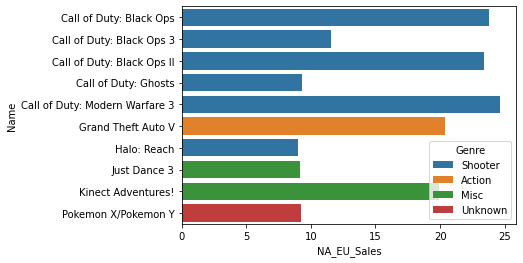

In [33]:
#1번 분석을 보면 북미와 유럽은 Platform과 Shooting 게임의 장르가 가장 큰 인기를 끌었다.
#게임 시장과 사람들의 문화가 매우 바꼈다고 판단해서 10년전의 게임 데이터는 분석에 크게 도움이 되지 않을 것 같아서 최근 10년 데이터만 사용
#그럼 북미와 유럽의 출고량을 합쳤을 때 가장 많은 출고량을 기록한 게임과 그 게임의 장르는 뭘까?
df['NA_EU_Sales'] = df['NA_Sales'] + df['EU_Sales']

#위의 2번 분석과 비슷하게 GTA, Call of Duty 시리즈가 높은 순위를 차지한다.
#특히 shooting 게임은 탑10 안에 6번 등장했다.
#다른 점은 포켓몬 게임은 존재하지 않다는 것.
df_na_eu = df.loc[df['Year'] >= 2010].sort_values(by = 'NA_EU_Sales',ascending = False)[:15][['Name','Genre','Year','Total_Sales','NA_EU_Sales']]
df_na_eu = df_na_eu.groupby(['Name','Year','Genre'])['NA_EU_Sales'].sum().to_frame().reset_index()
display(df_na_eu.head())
sns.barplot(x = 'NA_EU_Sales', y = 'Name', data= df_na_eu, hue = 'Genre', dodge = False, ci = None)

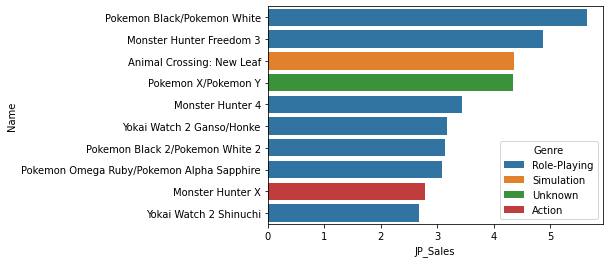

In [34]:
#포켓몬과 몬스터 헌터 시리즈 같은 롤 플레잉 게임이 탑10 안에 7번이나 나왔다.
df_jap = df.loc[df['Year'] >= 2010].sort_values(by = 'JP_Sales',ascending = False)[:10][['Name','Year','Genre','JP_Sales']]
sns.barplot(x = 'JP_Sales', y = 'Name', data= df_jap, hue = 'Genre', dodge = False)


결론)
전체 게임 데이터를 사용했을 때는 총 출고량의 평균이라는 데이터로 각각 장르별로, 연도별로 데이터를 비교했다.
최근 10년 간의 데이터, 또 지역별로 총 출고량을 비교할 때는 평균이 아닌 총합 데이터를 사용했다.

그 결과 평균을 사용했을 때는 북미와 유럽같은 경우 플랫폼 장르의 게임이 인기를 끌었지만, 총합을 사용했을 때는 top10 안에 플랫폼 게임이 포함되어 있지 않았었다. 플랫폼 게임이 한번에 큰 히트를 쳤다기보다는 꾸준히 너무 높지도, 낮지도 않은 출고량을 기록하며 오랫동안 사랑받았다고 해석했다. 

따라서 다음 분기 내가 제안하는 게임 설계 기준은 크게 두 가지이다. 첫째, 지역별로 다른 게임 장르를 사용한다. 위의 분석을 보면 북미와 유럽은 거의 전체 시장의 87퍼센트에 달하는 비중을 차지하고 있다. 게다가 두 지역의 상관관계는 양의 상관관계를 띄고, 1번 분석을 보면 알 수 있듯이, 사람들이 선호하는 게임 장르도 비슷하다. 그렇기 때문에 이 두 지역에 공통적으로 흥행할 수 있는 게임이 하나 필요하고, 두번째로는 일본 지역 타겟팅이다. 우리 나라에 비해 일본은 비디오 게임 시장이 많이 발달해있다. 그리고 총 시장에서 15퍼센트라는 적지 않은 비중을 차지하고 있기 때문에 북미와 유럽만 타겟팅 하는 것은 꽤나 큰 손실이 발생할 수 있을 것으로 판단한다. 또한, 일본 사람들이 선호하는 게임 장르와 북미,유럽 지역 사람들이 선호하는 게임 장르가 명확하게 구분 된다. 서구와는 다르게 Shooting이나 Platform, Action 장르의 게임보다는 Role-Playing 게임을 좋아한다. 이렇게 지역별로 명확한 차이가 있다는 것은 지역별로 타겟팅을 하는 것이 전체 시장을 하나로 보고 타겟팅하는 것보다 큰 메리트가 있다고 생각한다.

둘째, 장기적인 흥행도 좋지만, 지금은 단기적 흥행이 더 적합해보인다. 코로나로 인해 야외활동이 예전에 비해서는 줄어들면서 사람들이 집에서 보내는 시간이 많아졌다. 그럼 비디오 게임 시장은 이 시대적 상황을 기회로 잡을 수 있어야한다. 하지만, 코로나가 언제 끝날지 모르고, 1980,90년대에 비해 비디오 게임 시장이 많이 침체되어있는 상황에서는 잔잔하게 오래 사랑받는 게임보다는 시장을 다시 부활시킬만큼 파격적인 게임이 필요할 것 같다. 따라서 최근 몇년간의 게임 트렌드를 잘 반영해서 게임을 설계하면 좋을 것으로 판단된다.

북미, 유럽을 위한 게임(Shooter): Call of Duty 시리즈(더 세분화하면 Black ops나 Modern Warfare 새 시리즈)
일본을 위한 게임(Role-Playing): Poketmon or Monster Hunter 시리즈

기타 지역은 유럽지역과 0.72만큼의 양의 상관관계를 띄무로 유럽에서 흥행하면 기타 지역에서도 적당히 잘 흥행할 것이라고 판단해서 따로 타겟팅 하지 않았다. 지역을 너무 세분화하면 그에 따른 R&D(연구 & 개발) 비용이 더 발생할 것이기 때문에 2가지 지역으로만 세분화하는 것이 적당할 것 같다.

한계: 
1. 선호하는 연령층 데이터가 없어서 연령별로 그룹화 할 수 없었다.
2. 장르의 결측치를 Unknown 장르로 처리하고, 년도의 결측치를 2022로 처리해서 이 두 데이터는 사용하기 힘들었다. 어떤 장르인지도 불분명했고, 270여가지가 되는 년도의 데이터를 연도 트렌드에 사용할 수가 없었다.
3. 시간관계상 데이터들이 정규성, 등분산성을 만족한다고 가정했다.
